In [13]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway
import seaborn as sns

In [5]:
df = pd.read_excel('final_data.xlsx')

In [8]:
df = df.drop('Unnamed: 0', axis = 1)

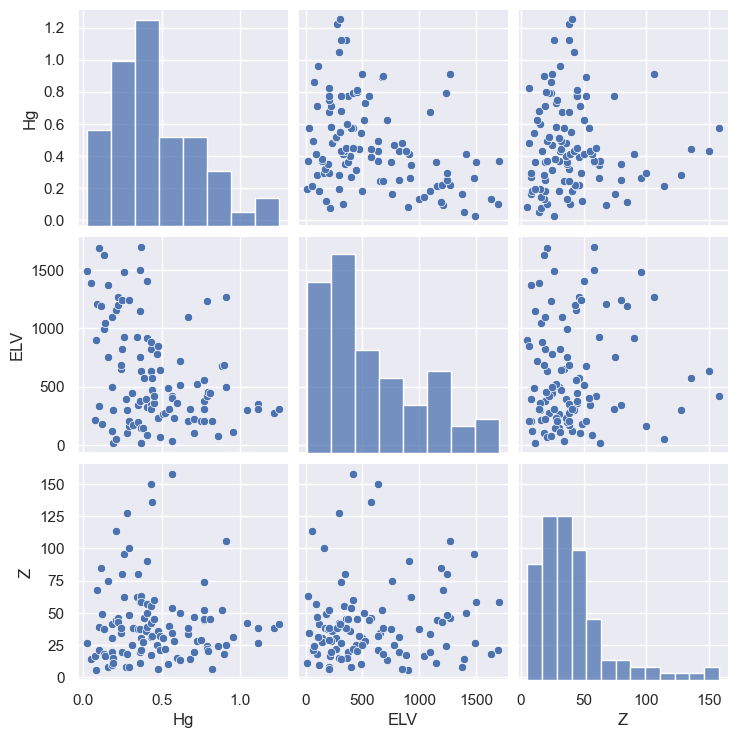

In [62]:
sns.set(color_codes = True)
sns.pairplot(df[['Hg', 'ELV', 'Z']])
plt.show()

### Question 1: Mercury levels across all the lakes in Maine. ###
Without dropping the outlier - the mean was 0.48

In [10]:
# Summary Statistics
mercury_levels = df['Hg']
Hg_mean = mercury_levels.mean()
Hg_std_dev = mercury_levels.std()
Hg_max = mercury_levels.max()
Hg_min = mercury_levels.min()

In [11]:
print("Mean mercury levels: ", format(Hg_mean, ".2f"))
print("Standard Deviation of mercury levels: ", format(Hg_std_dev, ".2f"))
print("Maximum recorded case of mercury levels: ", format(Hg_max, ".2f"))
print("Minimum recorded case of mercury levels: ", format(Hg_min, ".2f"))

Mean mercury levels:  0.46
Standard Deviation of mercury levels:  0.28
Maximum recorded case of mercury levels:  1.25
Minimum recorded case of mercury levels:  0.03


In [63]:
mercury_levels.median()

0.41

In [57]:
df2 = df.sort_values(by='Hg')

In [60]:
df.iloc[107]

Name     RANGE.P(LOWER)
Hg                 1.25
N                     3
ELV                 306
SA                  290
Z                    41
LT                    2
ST                    1
DA                   14
RF                 0.51
FR                  3.7
DAM                   0
LAT1                 44
LAT2                  2
LAT3                 25
LONG1                70
LONG2                21
LONG3                31
Name: 107, dtype: object

The state of Maine considers 0.43 ppm as the threshold for mercury contanimation. The analysis shows that the mean mercuty concentraion across lakes/ponds in Maine is 0.46 - higher than the threshold.

In [12]:
#  Hypothesis test to determine if Hg levels are high

# Set the threshold of concern
threshold = 0.43

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(mercury_levels, threshold)

# Check if the p-value is less than the significance level (e.g., 0.05)

print("P-value: ", format(p_value, ".2f"))

if p_value < 0.05:
    print("Mercury levels in Maine lakes are significantly higher than the threshold of concern.")
else:
    print("Mercury levels in Maine lakes are not significantly higher than the threshold of concern.")

P-value:  0.25
Mercury levels in Maine lakes are not significantly higher than the threshold of concern.


### Question 2: Impact of Dams and other human infrastructure on Mercury levels ###

In [67]:
df.loc[df['DAM'] == 0, 'Hg'].median()

0.49

In [25]:
Hg_with_dam_mean = df.loc[df['DAM'] == 1, 'Hg'].mean()
Hg_without_dam_mean = df.loc[df['DAM'] == 0, 'Hg'].mean()

Hg_with_dam_std = df.loc[df['DAM'] == 1, 'Hg'].std()
Hg_without_dam_std = df.loc[df['DAM'] == 0, 'Hg'].std()

Hg_with_dam_min = df.loc[df['DAM'] == 1, 'Hg'].min()
Hg_without_dam_min = df.loc[df['DAM'] == 0, 'Hg'].min()

Hg_with_dam_max = df.loc[df['DAM'] == 1, 'Hg'].max()
Hg_without_dam_max = df.loc[df['DAM'] == 0, 'Hg'].max()

print("Mean Mercury levels in Lakes with a Dam: ", format(Hg_with_dam_mean, ".2f"))
print("Std. Dev Mercury levels in Lakes with a Dam: ", format(Hg_with_dam_std, ".2f"))
print("Min Mercury levels in Lakes with a Dam: ", format(Hg_with_dam_min, ".2f"))
print("Max Mercury levels in Lakes with a Dam: ", format(Hg_with_dam_max, ".2f"))

print('\n')

print("Mean Mercury levels in Lakes without Dams: ", format(Hg_without_dam_mean, ".2f"))
print("Std. Dev Mercury levels in Lakes without Dams: ", format(Hg_without_dam_std, ".2f"))
print("Min Mercury levels in Lakes without Dams: ", format(Hg_without_dam_min, ".2f"))
print("Max Mercury levels in Lakes without Dams: ", format(Hg_without_dam_max, ".2f"))


Mean Mercury levels in Lakes with a Dam:  0.42
Std. Dev Mercury levels in Lakes with a Dam:  0.25
Min Mercury levels in Lakes with a Dam:  0.03
Max Mercury levels in Lakes with a Dam:  1.12


Mean Mercury levels in Lakes without Dams:  0.53
Std. Dev Mercury levels in Lakes without Dams:  0.31
Min Mercury levels in Lakes without Dams:  0.07
Max Mercury levels in Lakes without Dams:  1.25


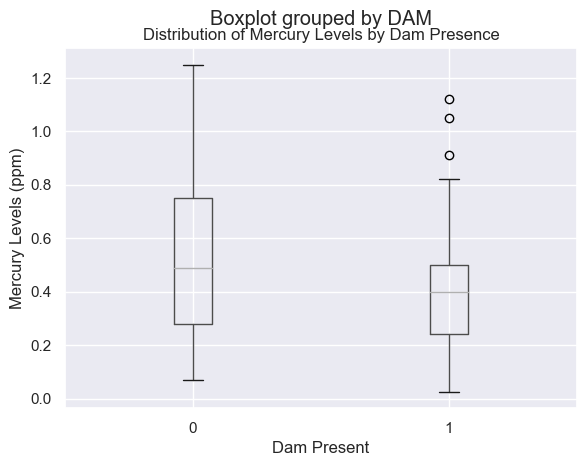

In [32]:
# Plot the distribution of mercury levels for lakes with and without a dam
fig, ax = plt.subplots()
df.boxplot(column = 'Hg', by = 'DAM', ax = ax)
ax.set_title('Distribution of Mercury Levels by Dam Presence')
ax.set_xlabel('Dam Present')
ax.set_ylabel('Mercury Levels (ppm)')
fig

In [33]:
# Extract dam presence from the data
dam_presence = df['DAM']

# Fit a linear regression model
X = sm.add_constant(dam_presence)
model = sm.OLS(mercury_levels, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Check if the dam presence coefficient is positive and statistically significant
# p-value = 0.66
if results.pvalues[1] < 0.05:
    print("There is a positive association between dam presence and mercury levels in Maine lakes.")
else:
    print("There is no significant association between dam presence and mercury levels in Maine lakes.")

# at 95% confidence, there is no significant association
# at 90% confidence, there is a positive association between dam presence and mercury levels

                            OLS Regression Results                            
Dep. Variable:                     Hg   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     4.254
Date:                Wed, 22 Feb 2023   Prob (F-statistic):             0.0416
Time:                        12:33:57   Log-Likelihood:                -12.373
No. Observations:                 108   AIC:                             28.75
Df Residuals:                     106   BIC:                             34.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5256      0.041     12.873      0.0

### Question 3: Mercury levels varying with Lake Type ###

In [40]:
# 1: Oligotrophic
# 2: Eutrophic
# 3: Mesotrophic
Hg_oligo= df.loc[df['LT'] == 1, 'Hg']
Hg_eu = df.loc[df['LT'] == 2, 'Hg']
Hg_meso = df.loc[df['LT'] == 3, 'Hg']


In [68]:
Hg_oligo.median()

0.36

In [42]:
print('Oligotrophic: \n')
print(Hg_oligo.describe())

Oligotrophic: 

count    19.000000
mean      0.382632
std       0.236569
min       0.090000
25%       0.245000
50%       0.360000
75%       0.435000
max       0.910000
Name: Hg, dtype: float64


In [69]:
Hg_eu.median()

0.46499999999999997

In [43]:
print('eutrophic:\n')
print(Hg_eu.describe())

eutrophic:

count    48.000000
mean      0.512188
std       0.331775
min       0.025000
25%       0.190000
50%       0.465000
75%       0.770000
max       1.250000
Name: Hg, dtype: float64


In [70]:
Hg_meso.median()

0.41

In [44]:
print('Mesotrophic:\n')
print(Hg_meso.describe())

Mesotrophic:

count    41.000000
mean      0.438073
std       0.213653
min       0.071000
25%       0.340000
50%       0.410000
75%       0.520000
max       1.120000
Name: Hg, dtype: float64


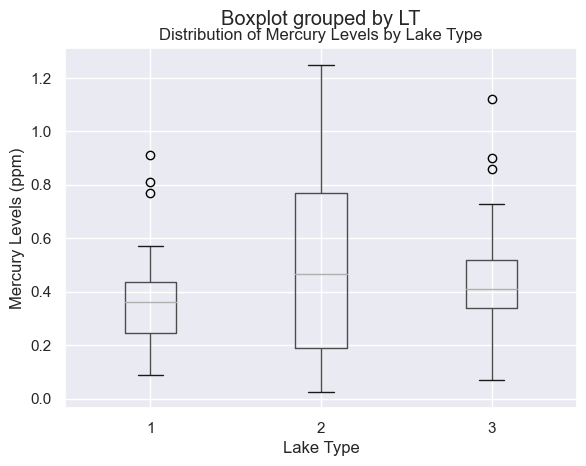

In [53]:
# Plot the distribution of mercury levels by lake type

df.boxplot(column='Hg', by='LT', ax=ax)
ax.set_title('Distribution of Mercury Levels by Lake Type')
ax.set_xlabel('Lake Type')
ax.set_ylabel('Mercury Levels (ppm)')
fig

In [50]:
lake_types = df['LT']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(mercury_levels[lake_types == 1], mercury_levels[lake_types == 2], mercury_levels[lake_types == 3])

# Check if the p-value is less than the significance level (e.g., 0.05)
print("p-value = ", format(p_value, ".2f"))
if p_value < 0.05:
    print("Mercury levels vary significantly across different lake types.")
else:
    print("Mercury levels do not vary significantly across different lake types.")

p-value =  0.18
Mercury levels do not vary significantly across different lake types.


### Miscellaneous Visualizations ###

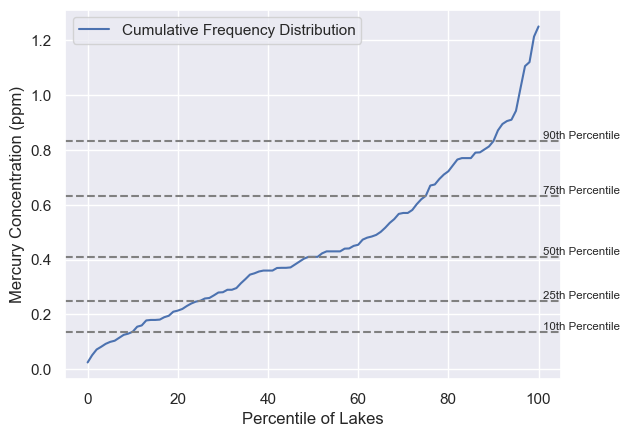

In [71]:
mercury_percentiles = np.arange(0, 101, 1)

# Calculate the corresponding percentiles of the number of lakes
num_lakes_percentiles = [np.percentile(df['Hg'], percentile) for percentile in mercury_percentiles]

# Plot the percentiles
fig, ax = plt.subplots()
plt.plot(mercury_percentiles, num_lakes_percentiles, label='Cumulative Frequency Distribution')

# Add percentile lines
percentiles = [10, 25, 50, 75, 90]
for percentile in percentiles:
    value = np.percentile(df['Hg'], percentile)
    plt.axhline(y=value, color='gray', linestyle='--')
    plt.text(1.01*max(mercury_percentiles), value, '{}th Percentile'.format(percentile, value), va='bottom', fontsize = 'x-small')

# Set axis labels and legend
plt.xlabel('Percentile of Lakes')
plt.ylabel('Mercury Concentration (ppm)')
plt.legend()

# Show the plot
fig

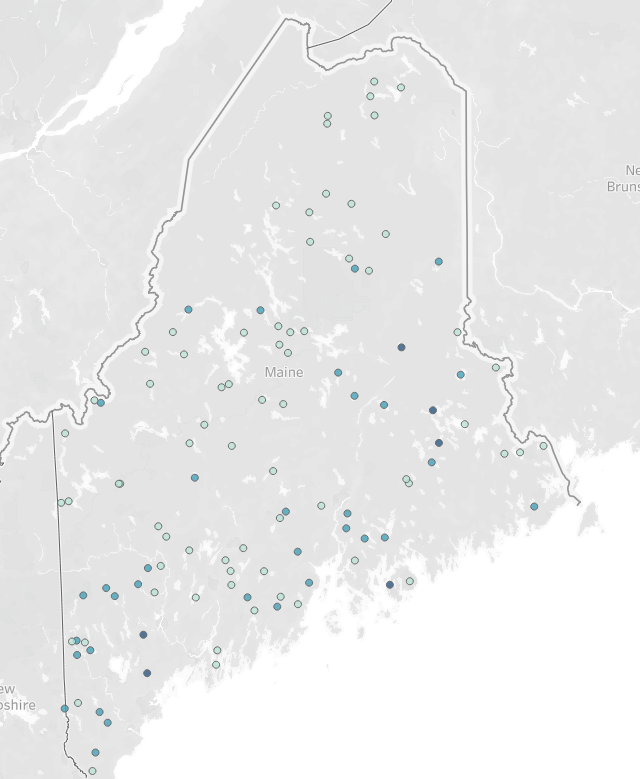